# **PROBLEMA: ESTIMATIVA EXPERIMENTAL DA COMPLEXIDADE DE UMA FUNÇÃO DE UMA BIBLIOTECA**

## **Métodos de segmentação de imagens do tipo  Thresholding (Limiarização):**
> Divide uma imagem em regiões ou objetos binários com base em um valor de limiar. Bibliotecas: OpenCV, scikit-image.

## **1. Importando bibliotecas**

In [14]:
# Bibliotecas para manipulação de arquivos e diretórios
import os
import shutil, glob, os.path

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

# Biblioteca para melhorar a estética das visualizações do Matplotlib
import seaborn as sns
sns.set()

# Biblioteca para manipulação de imagens
from PIL import Image

# Biblioteca OpenCV para processamento de imagens
import cv2

# Coleção de algoritmos para processamento de imagens
import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 

# Algoritmos de clustering do scikit-learn
from sklearn.cluster import DBSCAN, KMeans

# Biblioteca para exibir barras de progresso em loops
from tqdm import tqdm

# Biblioteca para medir o tempo de execução de certas operações
from time import time

# Módulo estatístico do SciPy
from scipy import stats

# Biblioteca para operações matemáticas
import math

# Biblioteca para operações matemáticas em arrays multidimensionais
import numpy as np
from numpy import mean, isnan, asarray

# Funções relacionadas à geração de números aleatórios
from random import shuffle, randint

# Configuração para exibir gráficos do Matplotlib diretamente no notebook
%matplotlib inline

## **2. Leitura e pré-processamento das imagens na pasta**

Usando Segmentação em Escala de Cinza.............
Arquivos no diretório:  C:\Users\duike\OneDrive\Documentos\Repositorios\EngenhariaDeProgramas\FACES 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senho

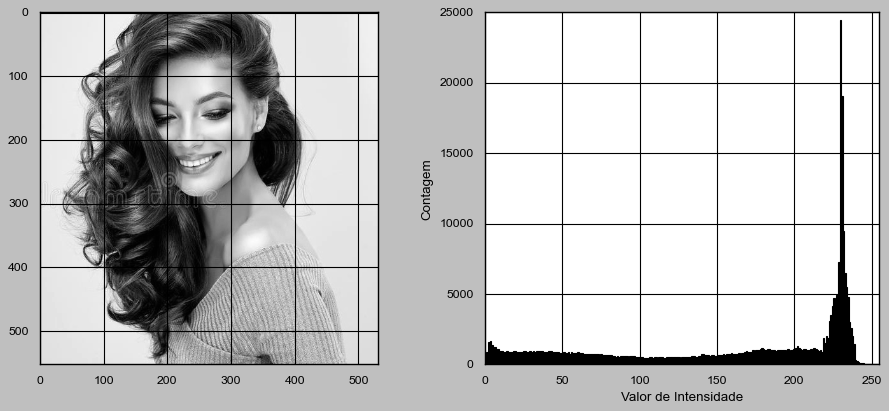

In [15]:
# PREPROCESSAMENTO DAS IMAGENS

Img = []      # Lista para armazenar as imagens originais
img = []      # Lista temporária para armazenar cada imagem enquanto é processada
ncolors = []  # Lista para armazenar o número de canais de cor de cada imagem
ResX = []     # Lista para armazenar a resolução X de cada imagem
ResY = []     # Lista para armazenar a resolução Y de cada imagem
n = []        # Lista para armazenar o número total de pixels de cada imagem

nImg = 1     # Número de imagens a serem processadas na ordem de leitura
ctr = 1       # Contador de imagens

# Define se as imagens serão convertidas para escala de cinza ou não
as_gray = True
if as_gray: 
    print("Usando Segmentação em Escala de Cinza.............")

# Caminho do diretório onde estão localizadas as imagens a serem processadas    
INPUT_PATH = "C:\\Users\\duike\\OneDrive\\Documentos\\Repositorios\\EngenhariaDeProgramas\\FACES" # foca = [0,0,0,1]

# Lista todos os arquivos no diretório especificado
Files = os.listdir(INPUT_PATH) # foca = [0,0,0,1]
print("Arquivos no diretório: ", INPUT_PATH, "\n", Files)
print("\nSelecionadas as ", nImg, "primeiras imagens")

# Loop sobre os arquivos no diretório (limitado às primeiras nImg imagens)
for filename in Files[:nImg]: 

    # Verifica se o arquivo possui uma extensão de imagem válida
    if filename.endswith('.jpg') or filename.endswith('.png'):
        try:
            print("\nImagem #", ctr, ':', filename)
            ctr+=1
            
            # Carrega a imagem do arquivo
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray))
            
            # Faz backup da imagem original
            Img.append(img[-1])
            
            # Armazena informações sobre a imagem atual
            ncolors.append(img[-1].shape[-1]) # número de canais de cor
            ResX.append(img[-1].shape[0])     # resolução X
            ResY.append(img[-1].shape[1])     # resolução Y
            n.append(ResX[-1]*ResY[-1])       # número total de pixels

            print("Resolução da imagem: ", img[-1].shape)
            print("Número de canais de cor: ", ncolors[-1])
         
            # Exibe informações e histogramas das imagens
            if not as_gray: # Para trabalhar com imagens em RGB
                fig2, ax2 = plt.subplots(1,3, figsize=(20, 5.5)) 
                ax2[0].imshow(img[-1])
                
                if ncolors[-1]>1: 
                    ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
                    ax2[1].legend(["Total"])
                    ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = "Red", alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = "Green", alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = "Blue", alpha = 0.5)
                    ax2[2].legend(["Red_Channel", "Green_Channel", "Blue_Channel"])
                    ax2[1].set_xlim(0, 255)
                    ax2[1].set_xlabel("Valor de Intensidade")
                    ax2[1].set_ylabel("Contagem")
                    ax2[2].set_xlim(0, 255)
                    ax2[2].set_xlabel("Valor de Intensidade")
                    ax2[2].set_ylabel("Contagem")
            else:           # Para trabalhar com imagens em tons de cinza
                plt.style.use('grayscale')

                # Se for RGB, converte para tons de cinza
                if ncolors[-1]>1:
                    img[-1]=np.round(255*rgb2gray(img[-1]))
                    
                ncolors[-1] = 1
                fig2, ax2 = plt.subplots(1, 2, figsize=(14, 5.5))
                ax2[0].imshow(img[-1])
                ax2[1].hist(img[-1].ravel(), bins = 256)   
                ax2[1].set_xlim(0, 255)
                ax2[1].set_xlabel("Valor de Intensidade")
                ax2[1].set_ylabel("Contagem")
                
            plt.show()
        except (IOError, SyntaxError) as e:
            print("Arquivo ruim:", filename)
            #os.remove(base_dir+"\\"+filename) (Talvez) # Remove o arquivo se estiver corrompido ou tiver erro de sintaxe


## **3. Transformando imagens em matriz**

In [16]:
# Transforma imagens em matriz de inteiros

Images = []  # Lista para armazenar as imagens como matrizes de inteiros
n = []       # Lista para armazenar o tamanho de cada matriz de imagem
ctr = 1 

# Loop sobre as imagens carregadas
for my_img in range(nImg): 
    # Obtém a imagem atual
    image = img[my_img] 
    # Lista para armazenar os vetores de canal de cor 
    ch = [] 

    # Loop sobre os canais de cor da imagem
    for c in range(ncolors[my_img]): 
        if ncolors[my_img] > 1: 
            ch.append(image[:,:,c].flatten()) # Achata e armazena cada canal de cor
        else:
            ch.append(image.flatten()) # Se a imagem for em escala de cinza, achatamos a imagem inteira
            
    Images.append(np.array(ch)) # Converte a lista de vetores de canal de cor em uma matriz NumPy e a armazena
    n.append(len(Images[-1].flatten())) # pegando o tamanho do problema
    
    print("Tamanho da matriz", ctr, ":", n[-1])
    print(ch)
    
    ctr+=1

Tamanho da matriz 1 : 293643
[array([229., 229., 229., ..., 218., 218., 218.])]


## **4. Cores dos clusters**

In [17]:
my_color = []
my_color.append('#%06X' % 0)
my_color.append('#%06X' % 0xFFFFFF)
for i in range(20):
    my_color.append('#%06X' % randint(0, 0xFFFFFF))

## **5. Implementação do Kmeans**

In [18]:
def kmeans(image, K, ncolors, n, maxiter):
    tempo_inicio = time()

    cc = np.zeros((ncolors, K), dtype = int)

    classe = [-1 for i in range(n)]

    """
    for k in range(K):
        p = randint(0, n - 1)
        for c in range(ncolors):
            cc[c, k] = image[c, p]
    """

    S = 256 / K
    ct = 0

    for k in range(K):
        ct += S
        for c in range(ncolors):
            cc[c, k] = ct

    INIT_TIME = time() - tempo_inicio

    tempo_inicio = time()

    #Processo iterativo

    iteracoes = 0

    while True:
        iteracoes+=1

        if iteracoes > maxiter:
            break

        mudanca = 0

        for i in range(n):
            d_minima = 1e30
            k_mais_prox = -1

            for k in range(K):
                d = 0

                for c in range(ncolors):
                    d += np.abs(image[c][i] - cc[c][k])

                if d < d_minima:
                    d_minima = d
                    k_mais_prox = k
                
            if classe[i] != k_mais_prox:
                classe[i] = k_mais_prox
                mudanca += 1

        if mudanca == 0:
            ITER_TIME = time() - tempo_inicio
            break
        else:
            cluster_sz = [0 for k in range(K)]
            for i in range(n):
                for c in range(ncolors):
                    cc[c][classe[i]] += image[c][i]
                    cluster_sz[classe[i]] += 1
            for k in range(K):
                if cluster_sz[k] > 0:
                    for c in range(ncolors):
                        cc[c][k] = int(cc[c][k] / cluster_sz[k])
                else:
                    iteracoes = 0
                    for k in range(K):
                        p = randint(0, n - 1)
                        for c in range(ncolors):
                            cc[c, k] = image[c, p]
    
    return INIT_TIME, ITER_TIME, iteracoes, classe, cc


## **6. Teste do Kmeans**

n K inTime (Std) itTime (Std) Iterações (Std)
293643 2 0.008416962623596192 ( 0.0009281845409470417 ) 5.60451078414917 ( 0.1377119952947823 ) 6.0 ( 0.0 )
Cluster 0 Limites 0.0 : 134.0
Cluster 1 Limites 135.0 : 254.0


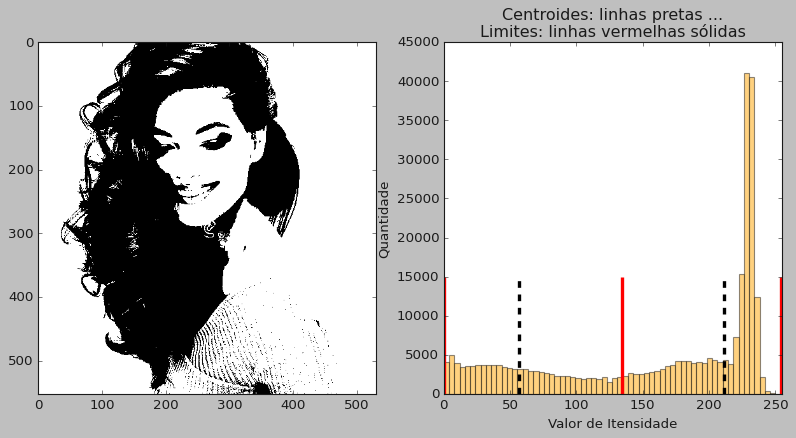

293643 3 0.007266807556152344 ( 0.000497087091890384 ) 14.151388120651244 ( 0.06734233276069898 ) 11.0 ( 0.0 )
Cluster 0 Limites 0.0 : 94.0
Cluster 1 Limites 95.0 : 184.0
Cluster 2 Limites 185.0 : 254.0


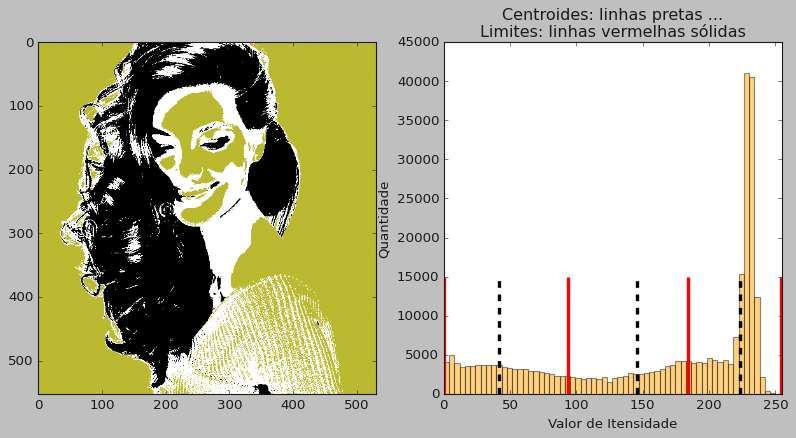

293643 4 0.007868146896362305 ( 0.0007879924858425946 ) 27.98554847240448 ( 0.07016051231041774 ) 17.0 ( 0.0 )
Cluster 0 Limites 0.0 : 61.0
Cluster 1 Limites 62.0 : 130.0
Cluster 2 Limites 131.0 : 197.0
Cluster 3 Limites 198.0 : 254.0


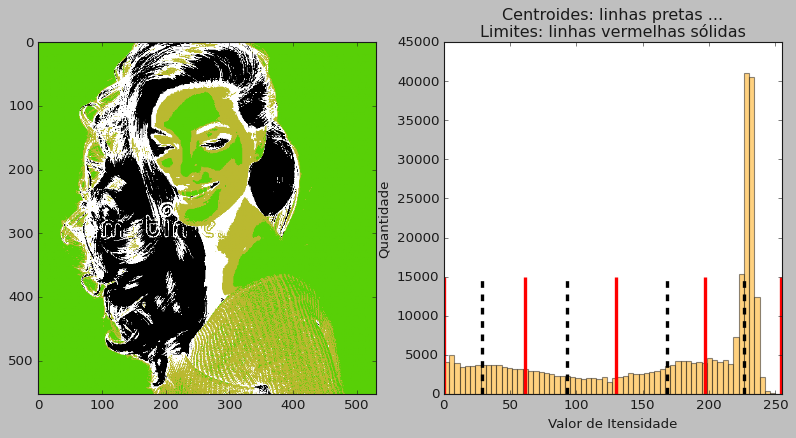

In [19]:
# Bateria de experimentos
plt.style.use("classic")

RODADAS_BENCHMARK = 10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

L = 256

for i in range(nImg):
    x = ResX[i]
    y = ResY[i]
    N = x * y

    print("n K inTime (Std) itTime (Std) Iterações (Std)")

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):
        InTime = []
        ItTime = []
        Iter = []

        for bench in range(RODADAS_BENCHMARK):
            InitTime, IterTime, iteractions, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            InTime.append(InitTime)
            ItTime.append(IterTime)
            Iter.append(iteractions)

        print(N, K, np.mean(InTime), '(', np.std(InTime), ')', np.mean(ItTime), '(', np.std(ItTime), ')', np.mean(Iter), '(', np.std(Iter), ')')

        OrderOf = np.argsort(centros)[0]

        up = []
        dw = []
        for k in range(K):
            clsslst = np.argwhere(np.array(classe) == k)
            clsspxls = Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print("Cluster", k, "Limites", dw[-1], ':', up[-1])
            
        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        fig, ax = plt.subplots(1, 2, figsize = (12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x, y, -1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = "orange", alpha = 0.5)
        ax[1].set_xlim(0, L - 1)

        if ncolors[i] > 1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C=centros
        ax[1].vlines(C, 0, 15000, linestyles = "dashed", linewidths = 3, colors = "black") #Centroides
        ax[1].vlines([0] + up, 0, 15000, linestyles = "solid", linewidths = 3, colors = "red") #Limites
        ax[1].set_xlabel("Valor de Itensidade")
        ax[1].set_ylabel("Quantidade")
        ax[1].set_title("Centroides: linhas pretas ...\nLimites: linhas vermelhas sólidas")

        plt.show()
            

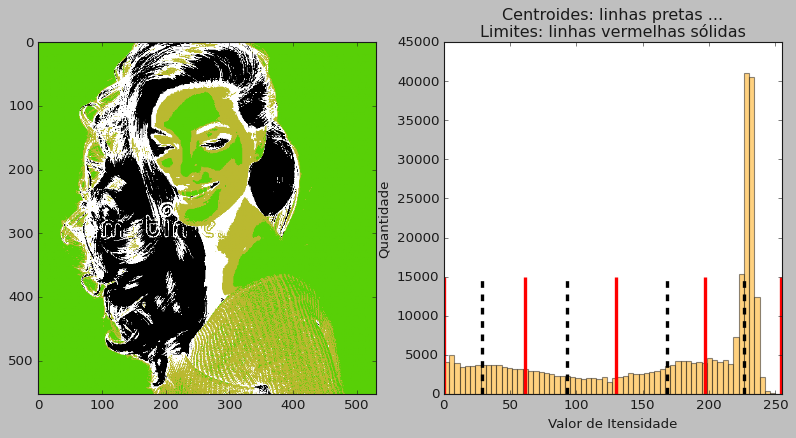

[[ 29  93 168 226]]


In [33]:
        fig, ax = plt.subplots(1, 2, figsize = (12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x, y, -1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = "orange", alpha = 0.5)
        ax[1].set_xlim(0, L - 1)

        if ncolors[i] > 1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
                print("teste")
        else:
            C=centros
        ax[1].vlines(C, 0, 15000, linestyles = "dashed", linewidths = 3, colors = "black") #Centroides
        ax[1].vlines([0] + up, 0, 15000, linestyles = "solid", linewidths = 3, colors = "red") #Limites
        ax[1].set_xlabel("Valor de Itensidade")
        ax[1].set_ylabel("Quantidade")
        ax[1].set_title("Centroides: linhas pretas ...\nLimites: linhas vermelhas sólidas")

        plt.show()


print(C)